In [78]:
from pathlib import Path
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers


In [67]:
### Set Variables
IMAGE_SIZE = "300p"  # Options include 300p, 500p, 720p, fullsize
MIN_SAMPLES = 10  # The minimum number of samples needed to be included in a prediction

# These variables shouldn't have to change
DATA_PATH = Path("./data/fungi-clef-2025")
MD_PATH = DATA_PATH / "metadata/FungiTastic-FewShot"
IMAGE_PATH = DATA_PATH / "images/FungiTastic-FewShot"

In [70]:
# Load the metadata for each split
md_train = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Train.csv")
md_val = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Val.csv")
md_test = pd.read_csv(MD_PATH / "FungiTastic-FewShot-Test.csv")

# Label each split
md_train["split"] = "train"
md_val["split"] = "val"
md_test["split"] = "test"

# Join all of the data together
full_df = pd.concat([md_train, md_val, md_test])

In [71]:
# Add the full location for each image
full_df["image_path"] = full_df.apply(
    lambda row: IMAGE_PATH / f"{row['split']}/{IMAGE_SIZE}/{row['filename']}", axis=1
)

In [73]:
# Filter out all fungi that don't have at least 10 samples throughout the full dataset
class_counts = full_df["class"].value_counts()
frequent_classes = class_counts[class_counts >= MIN_SAMPLES].index
filtered_df = full_df[full_df["class"].isin(frequent_classes)]

In [ ]:
# Load all of the images and labels
images = []
labels = []

for idx, row in filtered_df.iterrows():
    # Load and save the image as an array
    img = load_img(row["image_path"])
    img_arr = img_to_array(img)
    images.append(img_arr)

    # Append the class to the list of labels
    labels.append(row["class"])

# This won't work because all of the images are a different size
# Do we want to crop them all?
# images = np.stack(images)

(array([2.200e+01, 2.871e+03, 5.339e+03, 5.310e+02, 1.080e+03, 1.120e+02,
        4.500e+01, 1.300e+01, 5.000e+00, 3.000e+00]),
 array([ 40. , 121.1, 202.2, 283.3, 364.4, 445.5, 526.6, 607.7, 688.8,
        769.9, 851. ]),
 <BarContainer object of 10 artists>)

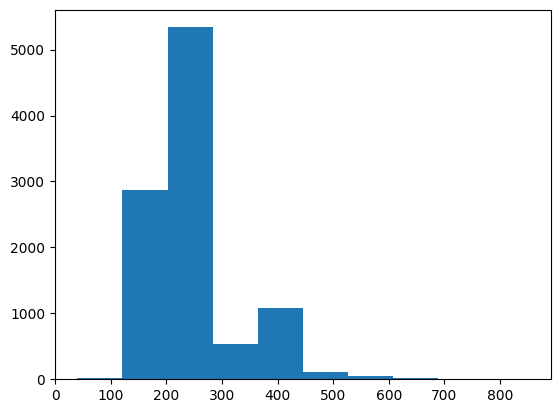

In [93]:
# How tall are all of the images?
heights = [img.shape[0] for img in images]
plt.hist(heights)

In [ ]:
# Split the data again

# Augment the training data with some horizontal flips
# This assumes that all of the images are right side up! Might want to examine that

# Rescale all of the images by dividing each pixel by 255?